<a href="https://colab.research.google.com/github/ofakduman/Acme-Hired-Web-App/blob/main/LSTM_forecastingV0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive'a Bağlanmak


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/LSTM_forecasting/Data/COMBASE/ComBaseExport-1.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Verileri Dosyalardan Al ve Birlestir

In [ ]:
!pip install tqdm

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# COMBASE klasörünün yolu
path = '/content/drive/MyDrive/LSTM_forecasting/Data/COMBASE'

# COMBASE ve alt klasörlerindeki tüm .xlsx dosyalarını bul
excel_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.xlsx'):
            excel_files.append(os.path.join(root, file))

# Tüm .xlsx dosyalarını oku ve birleştir
dataframes = []
for file in tqdm(excel_files, desc="Dosyaları Okuma İlerlemesi"):
    try:
        df = pd.read_excel(file, engine='openpyxl')
        dataframes.append(df)
    except Exception as e:
        print(f"Dosya okunamadı: {file}, Hata: {e}")

# pandas.concat kullanarak tüm dataframes'i birleştir
all_data = pd.concat(dataframes, ignore_index=True)

# Son DataFrame
all_data.head(5)


Dosyaları Okuma İlerlemesi: 100%|██████████| 480/480 [07:36<00:00,  1.05it/s]


,Record ID,Organism,Food category,Food Name,Temperature (C),Aw,pH,Assumed,Max.rate(logc.conc / h),Conditions,Logcs
0,O084_1,Listeria monocytogenes/innocua,Bread,fruit malt loaf,15,0.89,5.2,NaN,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;5.77;48;4.15;72;4.86;96;5.86;168;5.4...
1,O084_2,Listeria monocytogenes/innocua,Bread,fruit malt loaf,15,0.89,5.2,NaN,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;5.34;48;4.46;72;4.73;96;5.54;168;5.3...
2,O084_3,Listeria monocytogenes/innocua,Bread,fruit malt loaf,21,0.89,5.2,NaN,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;5.69;48;5.32;72;5.46;96;5.77;168;5.4...
3,O084_4,Listeria monocytogenes/innocua,Bread,fruit malt loaf,21,0.89,5.2,NaN,Fit data,Other species also deliberately inoculated (bu...,0;4.89;24;5.52;48;5.2;72;5.38;96;5.52;168;5.63...
4,O084_5,Listeria monocytogenes/innocua,Bread,fruit malt loaf,25,0.89,5.2,NaN,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;5.76;48;5.34;72;5.36;96;5.43;168;4.9...


In [ ]:
# prompt: all_data verisini kaydedelim

all_data.to_csv('all_data.csv', index=False)


In [ ]:
len(all_data)

24194

# Verilerin Ön Analizi

In [ ]:
# !pip install pandas openpyxl
# import pandas as pd
# from os.path import join
# import os

# culture_medium_path = "/content/drive/MyDrive/LSTM_forecasting/Data/COMBASE/Pseudomans/Culture Medium"

# # "/content/drive/MyDrive/LSTM_forecasting/Data/COMBASE" klasöründeki tüm dosyaları ve dizinleri listele
# all_files = os.listdir(culture_medium_path)

# # Sadece .xlsx uzantılı dosyaları filtrele
# xls_files = [f for f in all_files if f.endswith('.xlsx')]

# for xlsx_file in xls_files:
#   print(xlsx_file)

# # Belirtilen klasöre ait .xlsx dosyaları üzerinden dönelim
# for xlsx_file in xls_files:
#     file_path = join(culture_medium_path, xlsx_file)

#     # Dosyayı oku
# for xls_file in xls_files:
#     file_path = os.path.join(culture_medium_path, xls_file)

#     # Dosya uzantısına göre motoru belirle
#     if xls_file.endswith('.xlsx'):
#         engine = 'openpyxl'
#     elif xls_file.endswith('.xls'):
#         engine = 'xlrd'
#     else:
#         continue  # Desteklenmeyen dosya uzantısı

#     try:
#         # Dosyayı oku
#         df = pd.read_excel(file_path, engine=engine)

#         print(f"File Name: {xls_file}")
#         print(f"Number of Rows: {df.shape[0]}")
#         print(f"Number of Columns: {df.shape[1]}")
#         print(f"Columns: {', '.join(df.columns)}")
#         print(f"Missing Values: {df.isnull().sum().sum()}")
#         print("-----------------------")
#     except Exception as e:
#         print(f"Error reading file {xls_file}: {e}")

df = all_data.copy()


## Dosyaların Birleştirilmesi

In [ ]:
len(df)

24194

In [ ]:
len(df.dropna())

7804

In [ ]:
len(df)

24194

In [ ]:
# from zipfile import BadZipFile

# dfs = []

# for xls_file in xls_files:
#     file_path = os.path.join(culture_medium_path, xls_file)

#     if xls_file.endswith('.xlsx'):
#         engine = 'openpyxl'
#     elif xls_file.endswith('.xls'):
#         engine = 'xlrd'
#     else:
#         continue

#     try:
#         dfs.append(pd.read_excel(file_path, engine=engine))

#     except BadZipFile:
#         print(f"Problem with file: {xls_file}")
#         continue

# combined_df = pd.concat(dfs, axis=0)
# output_path = os.path.join(culture_medium_path, "combined_file.xlsx")
# combined_df.to_excel(output_path, index=False, engine='openpyxl')

# cleaned_df = combined_df.dropna()
# cleaned_df_copy = cleaned_df.copy()

cleaned_df = df.dropna().copy()
cleaned_df_copy = cleaned_df.copy()

In [ ]:
def analyze_logcs(logcs_str):
    # Değerleri ; ile böl ve float'a çevir
    values = list(map(float, logcs_str.split(';')))

    # Zaman ve populasyon değerlerini ayır
    times = values[::2]
    populations = values[1::2]

    # Populasyon değerlerinin artıp artmadığını kontrol et
    increases = 0
    decreases = 0
    for i in range(1, len(populations)):
        if populations[i] > populations[i-1]:
            increases += 1
        elif populations[i] < populations[i-1]:
            decreases += 1

    # Toplam değer sayısı ve artma/azalma sayılarına göre bir sonuç döndür
    return {
        "total_values": len(populations),
        "increases": increases,
        "decreases": decreases
    }

# `Logcs` kolonunu analiz edelim
results = cleaned_df['Logcs'].apply(analyze_logcs)

# Sonuçları yeni kolonlarda saklayalım
cleaned_df_copy['Total Values'] = results.apply(lambda x: x["total_values"])
cleaned_df_copy['Increases'] = results.apply(lambda x: x["increases"])
cleaned_df_copy['Decreases'] = results.apply(lambda x: x["decreases"])

# Sonuçları görelim
# print(cleaned_df_copy[['Total Values', 'Increases', 'Decreases']])


In [ ]:
cleaned_df_copy = cleaned_df_copy.drop_duplicates(subset='Record ID', keep='first')

In [ ]:
len(cleaned_df_copy)

2160

### Veri analizi

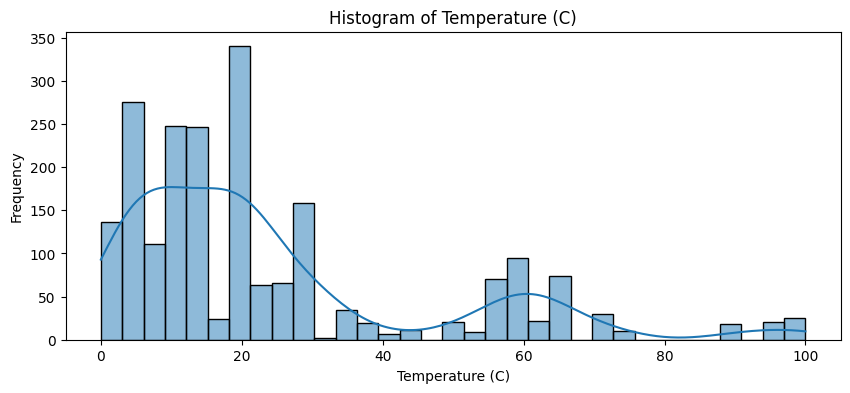


Temperature (C) - Statistical Species:
Min: 0.0
Max: 100.0
Mean: 24.509162377164248
Median: 20.0


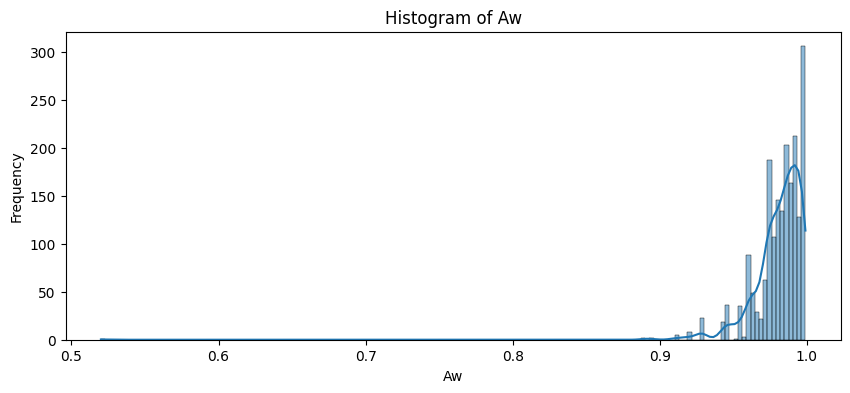


Aw - Statistical Species:
Min: 0.52
Max: 0.999
Mean: 0.9810086250634197
Median: 0.986


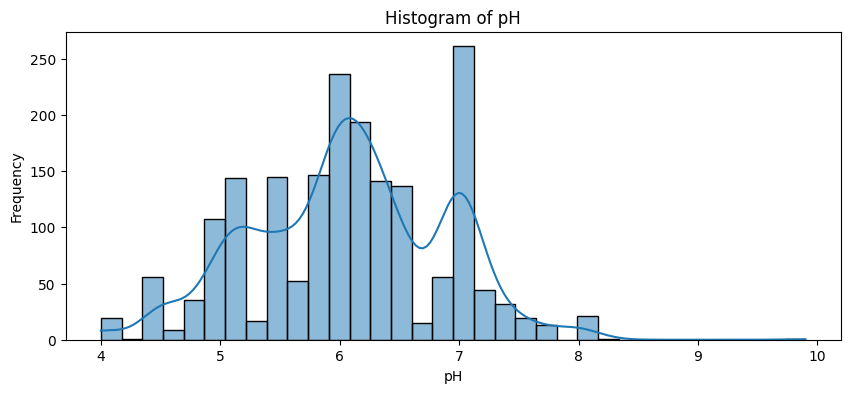


pH - Statistical Species:
Min: 4.0
Max: 9.9
Mean: 6.074335260115607
Median: 6.0


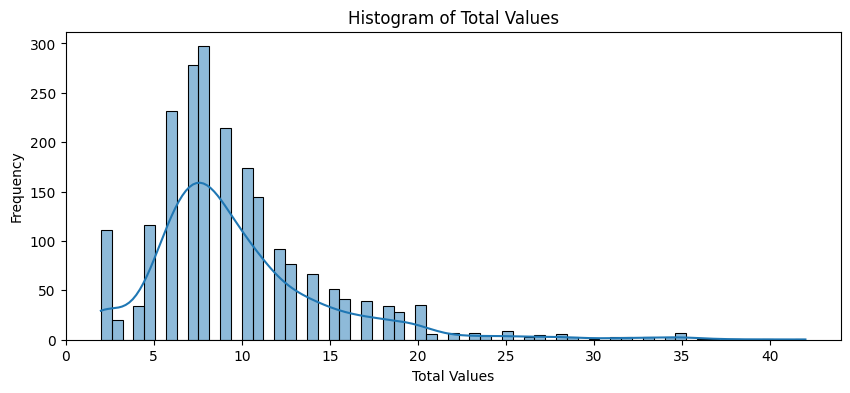


Total Values - Statistical Species:
Min: 2
Max: 42
Mean: 9.737037037037037
Median: 8.0


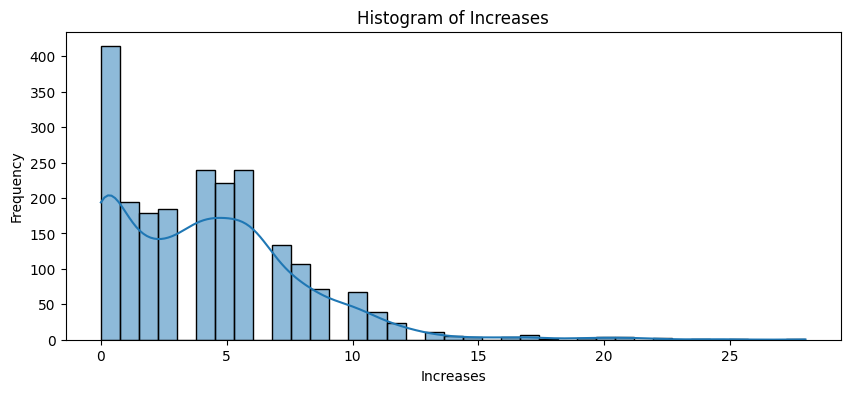


Increases - Statistical Species:
Min: 0
Max: 28
Mean: 4.265740740740741
Median: 4.0


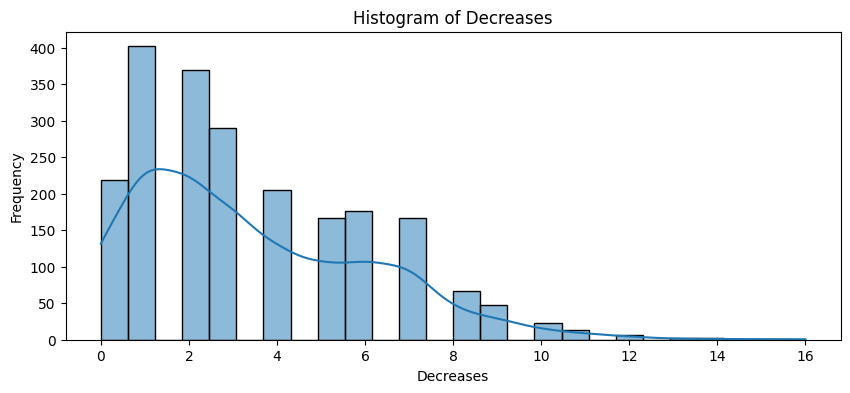


Decreases - Statistical Species:
Min: 0
Max: 16
Mean: 3.4310185185185187
Median: 3.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# Veri setinizi yükleyin
# cleaned_df_copy = pd.read_csv('your_dataset.csv')  # Örnek veri seti yolu
# Sayısal sütunları seçin (örnek olarak sadece sayısal verileri içeren sütunlar listelenmiştir)
numeric_columns = ['Temperature (C)', 'Aw', 'pH', 'Total Values', 'Increases', 'Decreases']
for col in numeric_columns:
    # Sayısal olmayan verileri ve NaN değerleri temizle
    cleaned_data = cleaned_df_copy[col].apply(pd.to_numeric, errors='coerce').dropna()
    squared_data = cleaned_data ** 2

    # Histogramı çiz
    plt.figure(figsize=(10, 4))
    sns.histplot(cleaned_data, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Temel İstatistiksel Özellikler
    print(f"\n{col} - Statistical Species:")
    print(f"Min: {cleaned_data.min()}")
    print(f"Max: {cleaned_data.max()}")
    print(f"Mean: {cleaned_data.mean()}")
    print(f"Median: {cleaned_data.median()}")




#### Pearson Correlation

In [ ]:
cleaned_df_copy.head()

,Record ID,Organism,Food category,Food Name,Temperature (C),Aw,pH,Assumed,Max.rate(logc.conc / h),Conditions,Logcs,Total Values,Increases,Decreases
8,O084_10,Listeria monocytogenes/innocua,Bread,fruit malt loaf,37,0.89,5.2,aw,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;4.34;48;3.48;72;-0.01;96;-0.01;168;-...,6,0,3
9,O084_9,Listeria monocytogenes/innocua,Bread,fruit malt loaf,37,0.89,5.2,aw,Fit data,Other species also deliberately inoculated (bu...,0;5.89;24;5.15;48;3.34;72;2.6;96;-0.01;168;-0.01,6,0,4
26,D003_4,Listeria monocytogenes/innocua,Egg or egg product,quiche,5,0.995,5.8,aw,Fit data,Sodium chloride in the environment: 1(%),0;3.53;24;3.69;96;3.74;168;4.58;216;4.87;264;5...,11,8,2
27,D003_1,Listeria monocytogenes/innocua,Egg or egg product,quiche,5,0.992,6.0,aw,Fit data,Sodium chloride in the environment: 1.4(%),0;3.4;24;3.43;96;3.51;168;3.41;216;3.41;240;3....,12,8,2
28,D003_2,Listeria monocytogenes/innocua,Egg or egg product,quiche,10,0.992,6.0,aw,Fit data,Sodium chloride in the environment: 1.4(%),0;3.48;24;3.54;48;3.74;72;4.03;96;5.42;168;7.3...,15,13,1


## Veri Hazirligi v2
#### Kisa olan verileri kullanmama

1.   Kisa olan verileri kullanmama
2.   Veriyi zaman formatina donusturme
3.   OneHotEncoding
4.   Veriyi modelin girdi boyutuna uygun hale getirmek
5.   Verinin Normalizasyonu

In [ ]:
cleaned_df_copy[cleaned_df_copy['Record ID'] == 'PS203']

,Record ID,Organism,Food category,Food Name,Temperature (C),Aw,pH,Assumed,Max.rate(logc.conc / h),Conditions,Logcs,Total Values,Increases,Decreases
8273,PS203,Pseudomonads,Culture medium,broth,15,0.971,6.5,aw,Fit data,Sodium chloride in the environment: 5(%),0;3.1;24;2.4;48;5.76;72;6.8;96;7.66;264;7.88;3...,11,6,4


In [ ]:
trashold_sample_value = 5
df = cleaned_df_copy[cleaned_df_copy['Total Values'] > trashold_sample_value]
len(df)

1879

In [ ]:
def parse_logcs(logcs_str):
    pairs = logcs_str.split(';')
    parsed_pairs = []
    for i in range(0, len(pairs) - 1, 2):
        try:
            # Zaman değerini tam sayıya dönüştür
            time = int(pairs[i])
            # Değer olarak ondalık sayı kullan
            value = float(pairs[i + 1])
            parsed_pairs.append((time, value))
        except ValueError:
            # Geçersiz dönüşüm olduğunda bu çifti atla
            continue
    return parsed_pairs

df['Logcs'] = df['Logcs'].apply(parse_logcs)


<ipython-input-50-26392d910f77>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Logcs'] = df['Logcs'].apply(parse_logcs)


In [ ]:
df.columns

Index(['Record ID', 'Organism', 'Food category', 'Food Name',
       'Temperature (C)', 'Aw', 'pH', 'Assumed', 'Max.rate(logc.conc / h)',
       'Conditions', 'Logcs', 'Total Values', 'Increases', 'Decreases'],
      dtype='object')

In [ ]:
#one hot encoding
# Kategorik sütunlar için OneHotEncoding uygulama

original_columns = set(df.columns)

df = pd.get_dummies(df, columns=['Organism', 'Food category', 'Food Name', 'Assumed'])
new_columns = set(df.columns) - original_columns

base_features = ['Temperature (C)', 'Aw', 'pH']
all_features = base_features + list(new_columns)


df.head(1)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Sayısal olmayan değerleri kontrol etme
for col in ['Temperature (C)', 'Aw', 'pH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# NA değerlerini silme
df.dropna(subset=['Temperature (C)', 'Aw', 'pH'], inplace=True)

# Normalleştirme işlemi
scaler = MinMaxScaler()
df[['Temperature (C)', 'Aw', 'pH']] = scaler.fit_transform(df[['Temperature (C)', 'Aw', 'pH']])

# İlk beş satırı göster
df.head(1)


,Record ID,Temperature (C),Aw,pH,Max.rate(logc.conc / h),Conditions,Logcs,Total Values,Increases,Decreases,...,Food Name_steamed egg,Food Name_turkey loaf,Assumed_Temp,Assumed_aw,Assumed_logc0,Assumed_pH,"Assumed_pH, aw",Assumed_temp,"Assumed_temp, aw","Assumed_temp, pH, aw"
8,O084_10,0.37,0.0,0.20339,Fit data,Other species also deliberately inoculated (bu...,"[(0, 5.89), (24, 4.34), (48, 3.48), (72, -0.01...",6,0,3,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df

# Regression - OneStepHead

## Veri Hazırlanması

In [ ]:
df.columns

In [ ]:
import pandas as pd
import numpy as np

# Örnek DataFrame (df) yükleyin veya oluşturun
# Örnek: df = pd.read_csv('your_data.csv')

# Hariç tutulacak sütunlar
exclude_columns = ['Record ID', 'Organism', 'Food category', 'Food Name', 'Assumed', 'Max.rate(logc.conc / h)', 'Conditions', 'Logcs', 'Total Values', 'Increases', 'Decreases']

# all_features listesini oluşturma
all_features = [col for col in df.columns if col not in exclude_columns]

# Veriyi hazırlama
X = []  # Girdiler
y = []  # Hedefler

for index, row in df.iterrows():
    logcs_data = row['Logcs']
    # Tüm uygun özellikleri al
    features = row[all_features].values
    for i in range(len(logcs_data)-1):
        X.append(np.concatenate(([logcs_data[i][1]], features)))  # current value and other features
        y.append(logcs_data[i+1][1])  # next value

X = np.array(X).reshape(-1, 1, len(X[0]))  # (samples, time steps, features)
y = np.array(y).reshape(-1, 1)


## Model Oluşturma ve Tahmin

Epoch 1/50
247/247 [==============================] - 7s 10ms/step - loss: 6.5367 - val_loss: 1.5774
Epoch 2/50
247/247 [==============================] - 2s 7ms/step - loss: 1.5049 - val_loss: 1.4110
Epoch 3/50
247/247 [==============================] - 2s 8ms/step - loss: 1.4189 - val_loss: 1.3866
Epoch 4/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3865 - val_loss: 1.3248
Epoch 5/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3701 - val_loss: 1.3142
Epoch 6/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3631 - val_loss: 1.3170
Epoch 7/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3527 - val_loss: 1.2923
Epoch 8/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3483 - val_loss: 1.3040
Epoch 9/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3373 - val_loss: 1.2671
Epoch 10/50
247/247 [==============================] - 1s 5ms/step - loss: 1.3278 - val_loss: 1.262

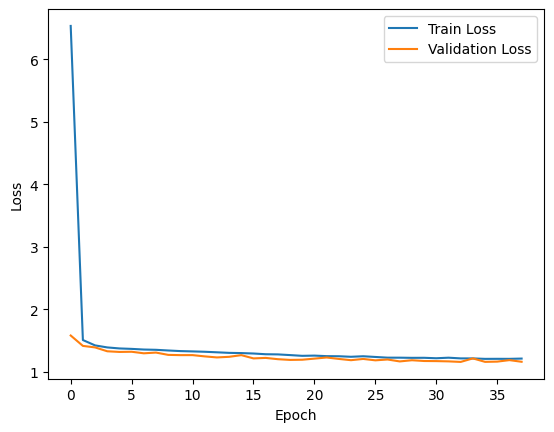

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Verilerinizi yükleyin veya oluşturun
# X ve y verilerini bu aşamada hazırlayın

# Verileri eğitim ve test kümesine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# LSTM modeli oluşturun
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dense(1))  # Çıkış katmanı

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error')  # İstediğiniz bir optimizasyon ve loss fonksiyonu kullanabilirsiniz

# Early Stopping callback'i oluşturun
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Modeli eğitin ve Early Stopping callback'ini kullanın
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Modelin performansını değerlendirin
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Tahminler yapın
predictions = model.predict(X_test)

# Eğitim ve doğrulama kayıplarını görselleştirin
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Sonuçları Grafikleştirme

62/62 [==============================] - 0s 3ms/step


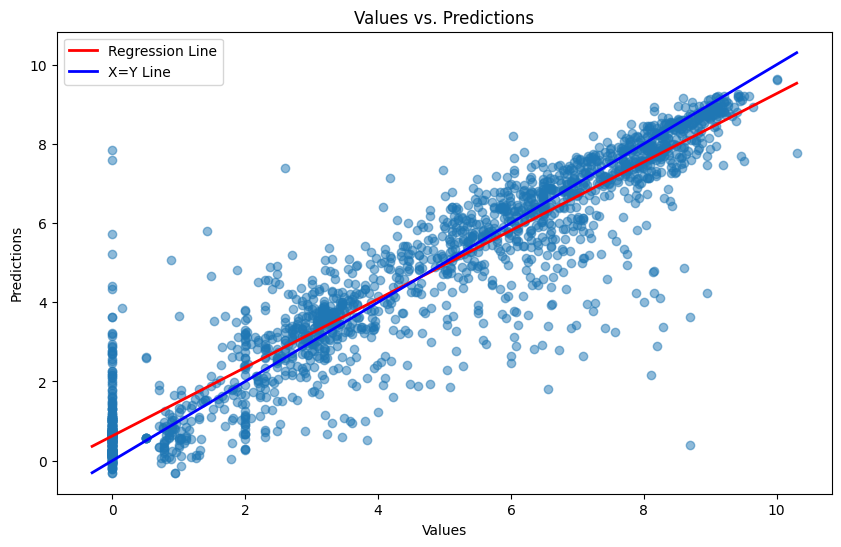

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Tahminleri ve gerçek değerleri alın
predictions = model.predict(X_test)

# Linear Regression modelini oluşturun ve eğitin
regression_model = LinearRegression()
y_test = y_test.reshape(-1, 1)  # Yeniden şekillendirme
predictions = predictions.reshape(-1, 1)  # Yeniden şekillendirme
regression_model.fit(y_test, predictions)

# Gerçek değerlerin minimum ve maksimum değerlerini alın
min_val = min(np.min(y_test), np.min(predictions))
max_val = max(np.max(y_test), np.max(predictions))

# Doğruyu çizmek için tahminler oluşturun
x_values = np.linspace(min_val, max_val, 100)
y_values = regression_model.predict(x_values.reshape(-1, 1))

# Scatter plot oluşturun
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression Line')

# X=Y doğrusunu çizmek için
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linewidth=2, label='X=Y Line')

plt.xlabel('Values')
plt.ylabel('Predictions')
plt.title('Values vs. Predictions')
plt.legend()
plt.show()


In [ ]:
# Tahminlerin boyutunu kontrol edin ve düzeltin
predictions = np.squeeze(predictions)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# Kök Ortalama Karesel Hata (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# R² Skoru
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 0.616
Root Mean Squared Error (RMSE): 0.950
R² Score: 0.839


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

predictions = np.squeeze(predictions)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# Kök Ortalama Karesel Hata (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# R² Skoru
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 0.701
Root Mean Squared Error (RMSE): 1.074
R² Score: 0.871


# ForeCasting "Encoder-Decoder version"

## Veri Hazirlama

In [ ]:
from sklearn.model_selection import train_test_split

# df DataFrame'ini ilk olarak eğitim ve test setlerine ayır
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# df_train DataFrame'ini daha sonra eğitim ve doğrulama setlerine ayır
df_train_partial, df_val = train_test_split(df_train, test_size=0.2, random_state=42)


In [ ]:
len(df)

1702

In [ ]:
# def prepare_data(df):
#     X, y = [], []

#     for index, row in df.iterrows():
#         logcs_data = row['Logcs']
#         features = row[['Temperature (C)', 'Aw', 'pH', 'Organism_Pseudomonads', 'Food category_Culture medium', 'Food Name_BHIB', 'Food Name_TSB', 'Food Name_broth', 'Assumed_aw', 'Assumed_pH, aw']].values

#         if len(logcs_data) > 5:
#             X_input = []
#             for i in range(5):
#                 X_input.extend([logcs_data[i][1]])
#                 X_input.extend(features)

#             y_output = [logcs_data[i][1] for i in range(5, len(logcs_data))]

#             X.append(X_input)
#             y.append(y_output)

#     return np.array(X).reshape(-1, 5, len(X[0]) // 5), np.array(y, dtype=object)

# # Eğitim, doğrulama ve test verilerini hazırla
# X_train, y_train = prepare_data(df_train_partial)
# X_val, y_val = prepare_data(df_val)
# X_test, y_test = prepare_data(df_test)


In [ ]:

def prepare_data(df):
    X, y = [], []

    # Hariç tutulacak sütunlar
    exclude_columns = ['Record ID', 'Organism', 'Food category', 'Food Name', 'Assumed', 'Max.rate(logc.conc / h)', 'Conditions', 'Logcs', 'Total Values', 'Increases', 'Decreases']
    # all_features listesini oluşturma
    all_features = [col for col in df.columns if col not in exclude_columns]

    for index, row in df.iterrows():
        logcs_data = row['Logcs']
        # all_features kullanarak özellikleri seç
        features = row[all_features].values

        if len(logcs_data) > 5:
            X_input = []
            for i in range(5):
                X_input.extend([logcs_data[i][1]])
                X_input.extend(features)

            y_output = [logcs_data[i][1] for i in range(5, len(logcs_data))]

            X.append(X_input)
            y.append(y_output)

    return np.array(X).reshape(-1, 5, len(X[0]) // 5), np.array(y, dtype=object)

# Modelin geri kalan kısmı aynı kalabilir
X_train, y_train = prepare_data(df_train_partial)
X_val, y_val = prepare_data(df_val)
X_test, y_test = prepare_data(df_test)


## Model Oluşturma

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

# Maksimum çıktı uzunluğunu hesapla
max_output_length = max(len(y) for y in y_train)

# Encoder
encoder_inputs = Input(shape=(5, len(X_train[0][0])))  # 5 zaman adımı, özellik sayısı
encoder_lstm = LSTM(50, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = RepeatVector(max_output_length)(encoder_outputs)  # Burada encoder çıktısını tekrarla
decoder_lstm = LSTM(50, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = TimeDistributed(Dense(1))  # Her zaman adımı için bir tahmin
decoder_outputs = decoder_dense(decoder_outputs)

# Model
model = Model(encoder_inputs, decoder_outputs)

# Model Derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Özeti
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 61)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 50),                 22400     ['input_1[0][0]']             
                              (None, 50),                                                         
                              (None, 50)]                                                         
                                                                                                  
 repeat_vector (RepeatVecto  (None, 26, 50)               0         ['lstm_2[0][0]']              
 r)                                                                                           

## Model Egitimi

Epoch 1/25
1/1 [==============================] - 0s 32ms/step
Training Loss: 2.2361118094949846, Validation Loss: 1.692038380878086
Epoch 2/25
1/1 [==============================] - 0s 21ms/step
Training Loss: 2.071787188538848, Validation Loss: 1.6515313246684566
Epoch 3/25
1/1 [==============================] - 0s 22ms/step
Training Loss: 1.9646373753280433, Validation Loss: 1.6510877335066674
Epoch 4/25
1/1 [==============================] - 0s 26ms/step
Training Loss: 1.8863308047033318, Validation Loss: 1.627476244310279
Epoch 5/25
1/1 [==============================] - 0s 23ms/step
Training Loss: 1.8189544180154196, Validation Loss: 1.59791467952035
Epoch 6/25
1/1 [==============================] - 0s 22ms/step
Training Loss: 1.7639916131119577, Validation Loss: 1.6340393155676893
Epoch 7/25
1/1 [==============================] - 0s 23ms/step
Training Loss: 1.7104830175566004, Validation Loss: 1.597050056581704
Epoch 8/25
1/1 [==============================] - 0s 21ms/step
Train

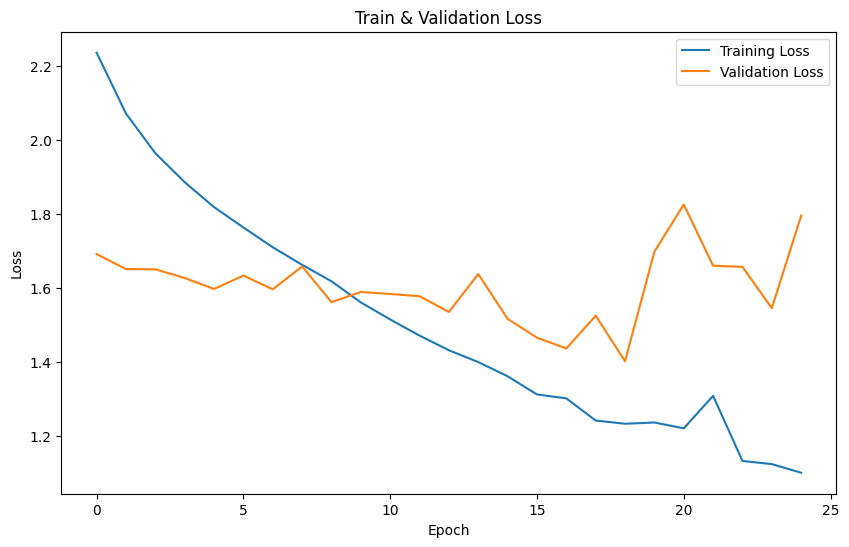

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.MeanSquaredError()

epochs = 25  # Toplam epoch sayısı
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    total_train_loss = 0
    total_val_loss = 0

    # Eğitim döngüsü
    for i in range(len(X_train)):
        with tf.GradientTape() as tape:
            y_pred = model(X_train[i:i+1], training=True)
            train_loss = loss_fn(y_train[i], y_pred[0, :len(y_train[i]), 0])
        gradients = tape.gradient(train_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        total_train_loss += train_loss.numpy()

    # Doğrulama döngüsü
    for i in range(len(X_val)):
        # X_val[i:i+1] dizisini tensöre dönüştür
        X_val_tensor = tf.convert_to_tensor(X_val[i:i+1], dtype=tf.float32)
        y_pred_val = model.predict(X_val_tensor)

        # y_val[i] dizisini tensöre dönüştür
        y_val_tensor = tf.convert_to_tensor(y_val[i], dtype=tf.float32)

        # Tahmin ve gerçek değerlerin boyutlarını eşitle
        min_length = min(y_pred_val.shape[1], len(y_val[i]))
        val_loss = loss_fn(y_val_tensor[:min_length], y_pred_val[0, :min_length, 0])

        total_val_loss += val_loss.numpy()

    # Ortalama kayıpları hesapla ve kaydet
    avg_train_loss = total_train_loss / len(X_train)
    avg_val_loss = total_val_loss / len(X_val)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}")

# Kayıpları grafik üzerinde görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Modelin Değerlendirilmesi

In [ ]:
# Test veri seti üzerinde tahmin yapma
y_pred = model.predict(X_test)


7/7 [==============================] - 0s 6ms/step


## Model Değerlendirme Sonuçları

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def calculate_metrics(y_true, y_pred):
    mse_values = []
    mae_values = []
    r2_values = []

    for i in range(len(y_true)):
        true_values = np.array(y_true[i])
        pred_values = y_pred[i, :len(y_true[i]), 0]

        mse = mean_squared_error(true_values, pred_values)
        mae = mean_absolute_error(true_values, pred_values)

        mse_values.append(mse)
        mae_values.append(mae)

        # R2 skorunu yalnızca birden fazla değeri olan örnekler için hesap
        if len(true_values) > 1:
            r2 = r2_score(true_values, pred_values)
            r2_values.append(r2)

    return np.mean(mse_values), np.mean(mae_values), np.mean(r2_values) if r2_values else np.nan

# Hata metriklerini hesaplama
mse, mae, r2 = calculate_metrics(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 1.756271876557317
Mean Absolute Error: 0.8594338260661499
R2 Score: -1.2645988294606775e+34


## Sonuçları Görselleştirme

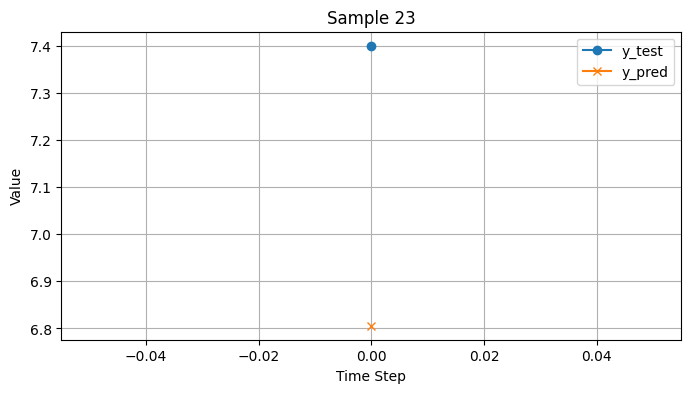

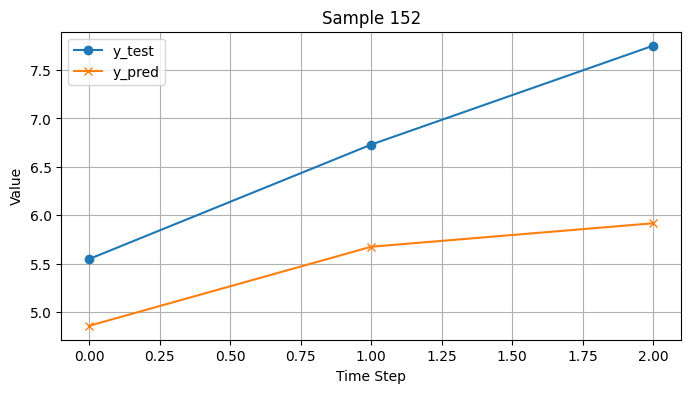

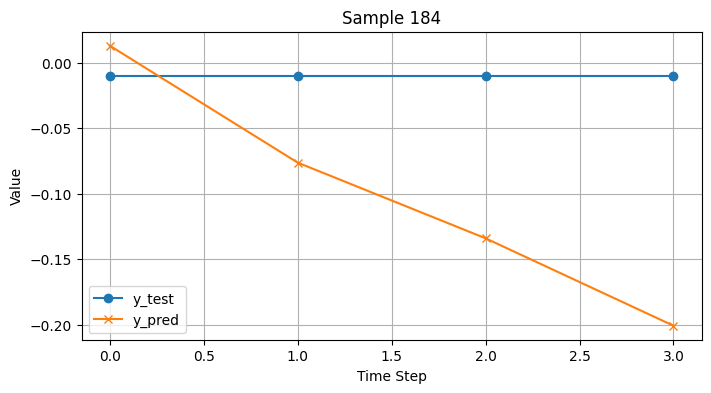

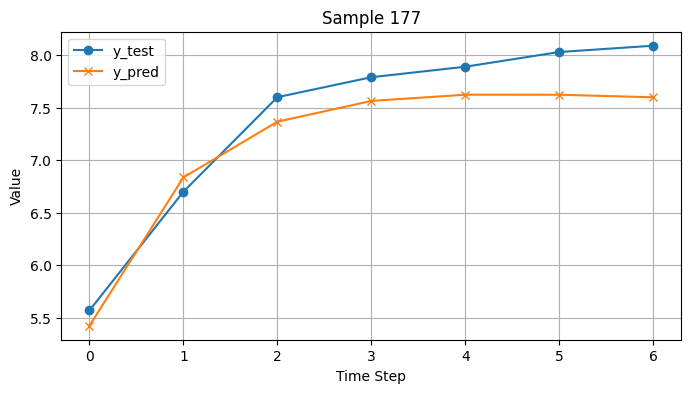

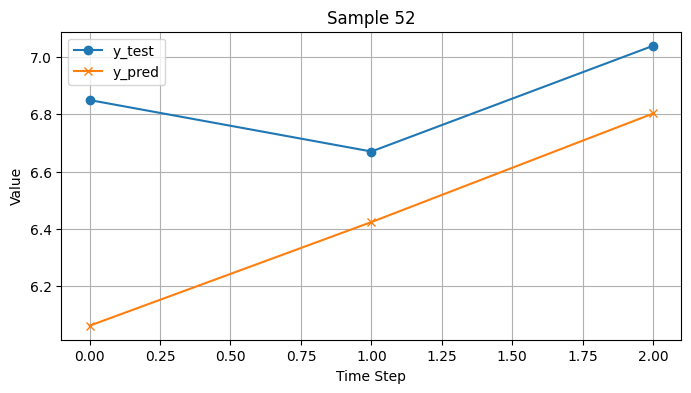

In [ ]:
import matplotlib.pyplot as plt
import random

selected_indices = random.sample(range(len(y_test)), 5)

for index in selected_indices:
    plt.figure(figsize=(8, 4))  # Grafik boyutu
    plt.plot(y_test[index], marker='o', label='y_test')

    # y_pred verisini y_test verisinin uzunluğu
    y_pred_trimmed = y_pred[index][:len(y_test[index])]
    plt.plot(y_pred_trimmed, marker='x', label='y_pred')

    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.title(f'Sample {index + 1}')
    plt.show()

# Encoder-Decoder Son


In [ ]:
!pip install nbconvert
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/preprocessing.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/preprocessing.ipynb to pdf
[NbConvertApp] Support files will be in preprocessing_files/
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Making directory ./preprocessing_files
[NbConvertApp] Writing 149116 bytes 